In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats

In [2]:
PATH = 'cluster_data/clusterData_no_light_29_03_22/25'

drop_columns = ['max_abs', 'name']

In [3]:
df = None
files = os.listdir(PATH)
for file in sorted(files):
    if df is None:
        df = pd.read_csv(PATH + '/' + file)
    else:
        temp = pd.read_csv(PATH + '/' + file)
        df = df.append(temp)

df = df.drop(columns=drop_columns)

df.region = df.region.map({0: 0, 1: 1, 3: 1, 4: 1})  # sub areas in CA1 are still CA1

df.region = df.region * 2
df['Label X Region'] = df.label + df.region
df['Label'] = df.label  # just for capitalization

df.Label = df.Label.map({1: 'PYR', 0: 'PV'})
df['Label X Region'] = df['Label X Region'].map({0: 'NEO_PV', 1: 'NEO_PYR', 2: 'CA1_PV', 3: 'CA1_PYR'})

In [4]:
def change_col(df, feature):
    #  converting features from their initial values to physical values
    #  1.6 is the time in ms of each waveform
    #  256 is the number of samples in the upsampled waveform
    conversion = 1.6 / 256 
    if feature in ['dep_sd', 'fzc_sd', 'szc_sd']: # 
        df[feature] = df[feature] * conversion * 1000 # micro seconds
    elif feature in ['fwhm', 'max_speed', 'trough2peak', 'rise_coef']:
        df[feature] = df[feature] * conversion # ms
    elif feature in ['dep_red', 'fzc_red', 'szc_red']:
        df[feature] = df[feature] * (conversion ** 2) * 1000 # 10^3 (micro s)^2
    elif feature in ['dep_graph_avg_speed', 'dep_graph_slowest_path', 'dep_graph_fastest_path', 
                     'fzc_graph_avg_speed', 'fzc_graph_slowest_path', 'fzc_graph_fastest_path',
                     'szc_graph_avg_speed', 'szc_graph_slowest_path', 'szc_graph_fastest_path']:
        df[feature] = (df[feature] * (1 / conversion)) # mm/s
    elif feature == 'rise_time':
        #  16 = 2 (bins in ms) * 8 (upsampling factor)
        df[feature] = df[feature] / 16 # ms
    elif feature == 'firing_rate':
        df[feature] = df[feature] * 1000 # ms -> s 

In [5]:
def calc_aw(a, b):
    a, b = a.copy(), b.copy()
    a.sort()
    b.sort()

    na = len(a)
    nb = len(b)

    smaller = np.median(a) < np.median(b)
    aw = 0
    for v in a:
        if smaller:
            aw_v = (v < b).sum() + 0.5 * (b == v).sum()
        else:
            aw_v = (v > b).sum() + 0.5 * (b == v).sum()
        aw += aw_v / nb
        if (aw_v / nb) > 1:
            raise AssertionError
    return aw / na

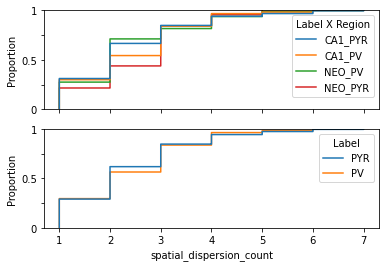

Median of pyramidal spatial_dispersion_count column is 2.0 [1.0, 3.0]
Median of pv spatial_dispersion_count column is 2.0 [1.0, 3.0]
Mann-Whitney statistical test results for feature spatial_dispersion_count are p-value=3.8561053038855017e-81
Number of unique values is: 7


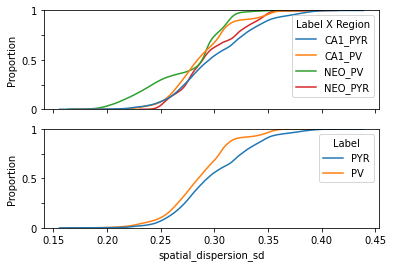

Median of pyramidal spatial_dispersion_sd column is 0.293318051009415 [0.2723208569127805, 0.3251663986554929]
Median of pv spatial_dispersion_sd column is 0.2849316240908301 [0.2657651372490389, 0.3047620555144361]
Mann-Whitney statistical test results for feature spatial_dispersion_sd are p-value=0.0
Number of unique values is: 690323


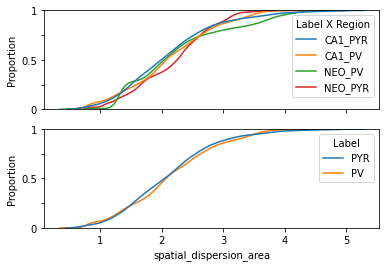

Median of pyramidal spatial_dispersion_area column is 2.049183528416304 [1.5332561379944254, 2.553892418995626]
Median of pv spatial_dispersion_area column is 2.07072870160847 [1.5742077395825138, 2.631646766481964]
Mann-Whitney statistical test results for feature spatial_dispersion_area are p-value=2.5534799945126143e-113
Number of unique values is: 690323


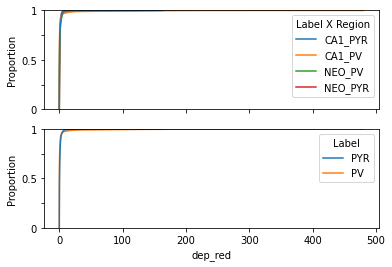

Median of pyramidal dep_red column is 0.3255208333333334 [0.10416666666666669, 1.004464285714286]
Median of pv dep_red column is 0.17578125000000006 [0.06510416666666669, 0.5859375000000001]
Mann-Whitney statistical test results for feature dep_red are p-value=0.0
Number of unique values is: 13196


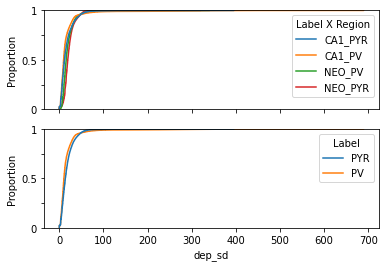

Median of pyramidal dep_sd column is 13.531646934131857 [7.795119555779044, 22.83341402240076]
Median of pv dep_sd column is 10.48869653970601 [6.25, 17.946206466287304]
Mann-Whitney statistical test results for feature dep_sd are p-value=0.0
Number of unique values is: 14291


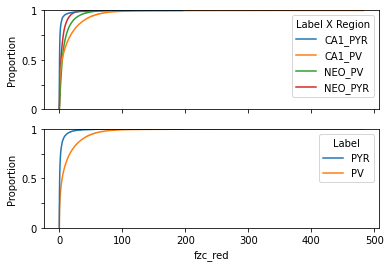

Median of pyramidal fzc_red column is 0.6171875000000001 [0.17578125000000006, 2.0768229166666665]
Median of pv fzc_red column is 4.511718750000001 [0.8268229166666669, 16.699218750000004]
Mann-Whitney statistical test results for feature fzc_red are p-value=0.0
Number of unique values is: 42349


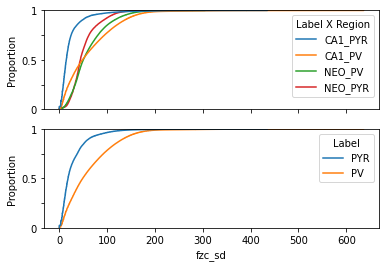

Median of pyramidal fzc_sd column is 18.221724671391566 [9.827063679225631, 37.50000000000001]
Median of pv fzc_sd column is 48.798053239857836 [21.505813167606565, 92.14458746991058]
Mann-Whitney statistical test results for feature fzc_sd are p-value=0.0
Number of unique values is: 49263


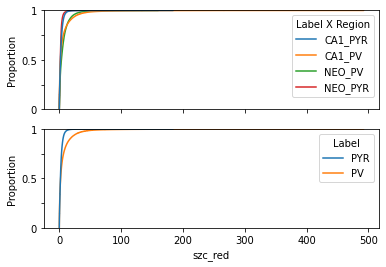

Median of pyramidal szc_red column is 1.8359375000000002 [0.7421875000000001, 3.5546875000000004]
Median of pv szc_red column is 2.1191406250000004 [0.5957031250000001, 6.867187500000002]
Mann-Whitney statistical test results for feature szc_red are p-value=0.0
Number of unique values is: 27883


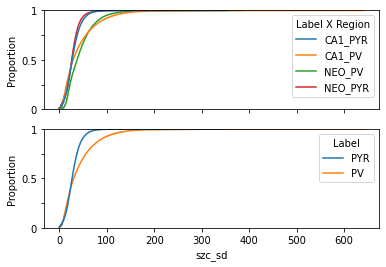

Median of pyramidal szc_sd column is 26.925824035672527 [18.37117307087384, 37.16517186829626]
Median of pv szc_sd column is 30.46514401738486 [16.170330603816815, 56.211406513466834]
Mann-Whitney statistical test results for feature szc_sd are p-value=0.0
Number of unique values is: 32613


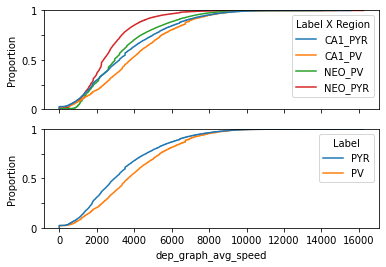

Median of pyramidal dep_graph_avg_speed column is 2942.051650113336 [1754.5369759569048, 4622.662622480297]
Median of pv dep_graph_avg_speed column is 3663.362644803815 [2281.6719223693162, 5363.277248444452]
Mann-Whitney statistical test results for feature dep_graph_avg_speed are p-value=0.0
Number of unique values is: 203490


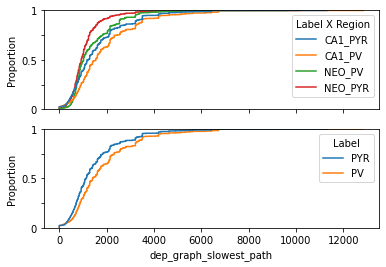

Median of pyramidal dep_graph_slowest_path column is 1127.290557043746 [714.6578219463744, 1837.69154214782]
Median of pv dep_graph_slowest_path column is 1409.1131963046828 [877.2684879784524, 2320.0]
Mann-Whitney statistical test results for feature dep_graph_slowest_path are p-value=0.0
Number of unique values is: 2907


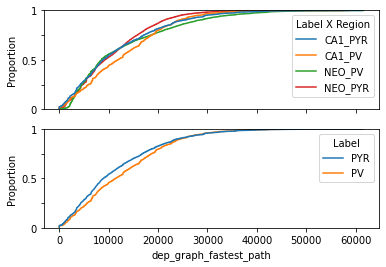

Median of pyramidal dep_graph_fastest_path column is 8913.020326741611 [4373.389100555432, 16831.92039751737]
Median of pv dep_graph_fastest_path column is 11370.969416277358 [5608.97871165888, 18592.327262215713]
Mann-Whitney statistical test results for feature dep_graph_fastest_path are p-value=0.0
Number of unique values is: 83211


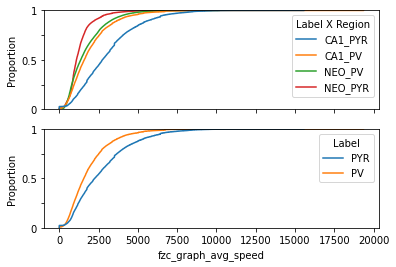

Median of pyramidal fzc_graph_avg_speed column is 2244.869330306422 [1215.117754685125, 3657.418653367777]
Median of pv fzc_graph_avg_speed column is 1557.371548938419 [919.0652001069866, 2508.9547323281436]
Mann-Whitney statistical test results for feature fzc_graph_avg_speed are p-value=0.0
Number of unique values is: 420593


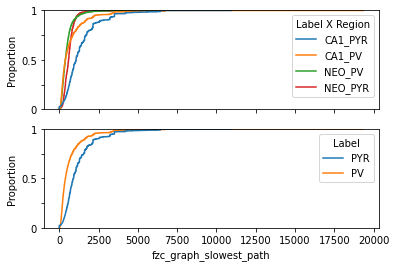

Median of pyramidal fzc_graph_slowest_path column is 892.9771914572119 [559.2974258710756, 1546.6666666666665]
Median of pv fzc_graph_slowest_path column is 385.8756276314948 [203.9607805437114, 808.9499366462674]
Mann-Whitney statistical test results for feature fzc_graph_slowest_path are p-value=0.0
Number of unique values is: 3352


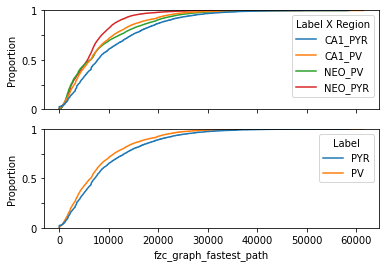

Median of pyramidal fzc_graph_fastest_path column is 7143.94029813803 [3509.0739519138097, 13158.784906051495]
Median of pv fzc_graph_fastest_path column is 6317.388809555058 [2928.6267804809895, 11041.357780327064]
Mann-Whitney statistical test results for feature fzc_graph_fastest_path are p-value=0.0
Number of unique values is: 300695


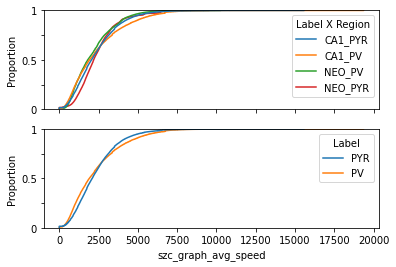

Median of pyramidal szc_graph_avg_speed column is 2089.694548963664 [1288.8232326879247, 3115.6231790236106]
Median of pv szc_graph_avg_speed column is 1906.2687987564457 [1036.4177995296864, 3284.5117261323594]
Mann-Whitney statistical test results for feature szc_graph_avg_speed are p-value=1.632041532092685e-219
Number of unique values is: 396583


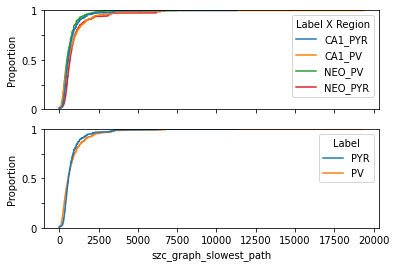

Median of pyramidal szc_graph_slowest_path column is 584.7200361379428 [402.6037703727666, 877.2684879784524]
Median of pv szc_graph_slowest_path column is 563.645278521873 [313.7522145130424, 961.3595814771701]
Mann-Whitney statistical test results for feature szc_graph_slowest_path are p-value=0.0
Number of unique values is: 3097


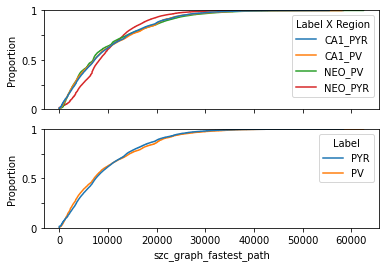

Median of pyramidal szc_graph_fastest_path column is 7474.181350905048 [3509.0739519138097, 13851.790850135572]
Median of pv szc_graph_fastest_path column is 7133.716392986125 [2971.622848646152, 14451.412429830012]
Mann-Whitney statistical test results for feature szc_graph_fastest_path are p-value=4.763392670098867e-44
Number of unique values is: 230491


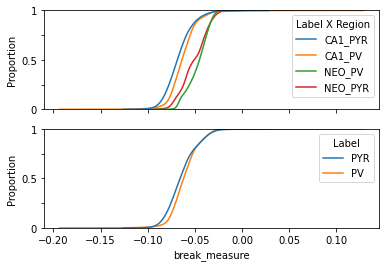

Median of pyramidal break_measure column is -0.06565034883836961 [-0.07542078776695638, -0.054283645496678495]
Median of pv break_measure column is -0.06196567122452494 [-0.07062443169839504, -0.052355789271415994]
Mann-Whitney statistical test results for feature break_measure are p-value=0.0
Number of unique values is: 690323


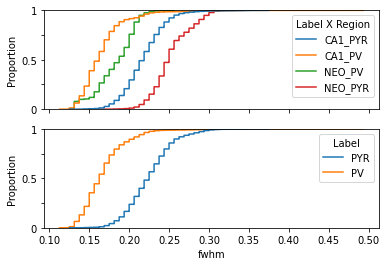

Median of pyramidal fwhm column is 0.225 [0.20625000000000002, 0.24375000000000002]
Median of pv fwhm column is 0.1625 [0.15000000000000002, 0.18125000000000002]
Mann-Whitney statistical test results for feature fwhm are p-value=0.0
Number of unique values is: 53


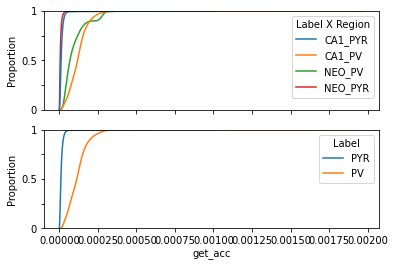

Median of pyramidal get_acc column is 1.0429865719268657e-05 [5.990224756027481e-06, 1.6917341659957075e-05]
Median of pv get_acc column is 0.00011354821437767944 [6.929617952635123e-05, 0.00015152290554982473]
Mann-Whitney statistical test results for feature get_acc are p-value=0.0
Number of unique values is: 690323


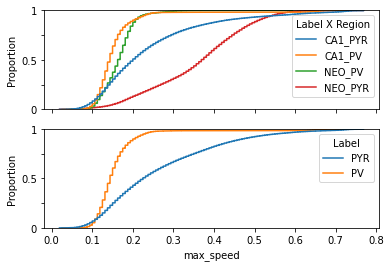

Median of pyramidal max_speed column is 0.225 [0.15000000000000002, 0.35000000000000003]
Median of pv max_speed column is 0.14375000000000002 [0.125, 0.16875]
Mann-Whitney statistical test results for feature max_speed are p-value=0.0
Number of unique values is: 121


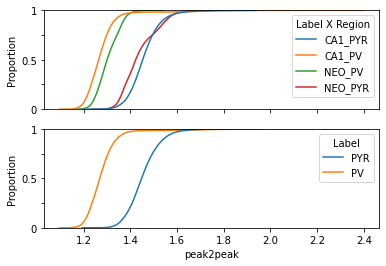

Median of pyramidal peak2peak column is 1.4479042447709318 [1.4073130278689319, 1.4943304415781231]
Median of pv peak2peak column is 1.2685111608754545 [1.2355999479014117, 1.30389112490294]
Mann-Whitney statistical test results for feature peak2peak are p-value=0.0
Number of unique values is: 690287


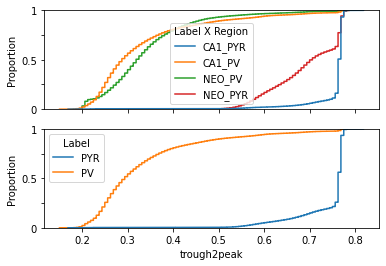

Median of pyramidal trough2peak column is 0.7625000000000001 [0.7562500000000001, 0.76875]
Median of pv trough2peak column is 0.29375 [0.25, 0.36875]
Mann-Whitney statistical test results for feature trough2peak are p-value=0.0
Number of unique values is: 107


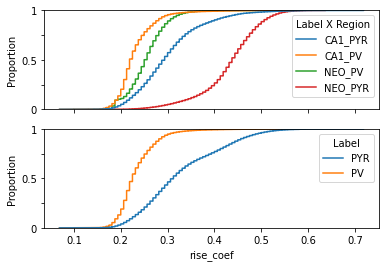

Median of pyramidal rise_coef column is 0.3125 [0.2625, 0.39375000000000004]
Median of pv rise_coef column is 0.225 [0.20625000000000002, 0.25625000000000003]
Mann-Whitney statistical test results for feature rise_coef are p-value=0.0
Number of unique values is: 101


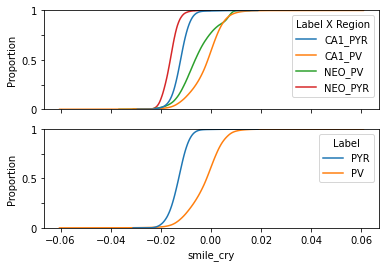

Median of pyramidal smile_cry column is -0.01285809301556566 [-0.01533802623622633, -0.010548009920640875]
Median of pv smile_cry column is -0.001687175268116143 [-0.006833196139655773, 0.0022101981208071803]
Mann-Whitney statistical test results for feature smile_cry are p-value=0.0
Number of unique values is: 690323


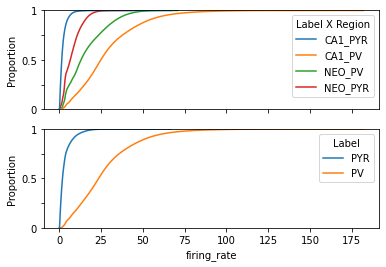

Median of pyramidal firing_rate column is 1.9110063456379942 [0.8780429126161178, 3.887518538647517]
Median of pv firing_rate column is 23.532180256501654 [13.280565220868855, 35.810205908716064]
Mann-Whitney statistical test results for feature firing_rate are p-value=0.0
Number of unique values is: 685354


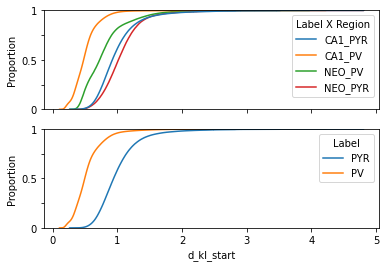

Median of pyramidal d_kl_start column is nan [nan, nan]
Median of pv d_kl_start column is nan [nan, nan]
Mann-Whitney statistical test results for feature d_kl_start are p-value=0.0
Number of unique values is: 688932


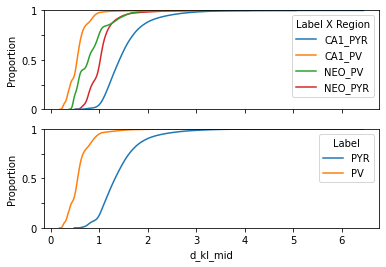

Median of pyramidal d_kl_mid column is 1.3227599667013474 [1.101237726230022, 1.6132372789848028]
Median of pv d_kl_mid column is 0.5502108030893256 [0.4228807732236263, 0.6631993875627697]
Mann-Whitney statistical test results for feature d_kl_mid are p-value=0.0
Number of unique values is: 690238


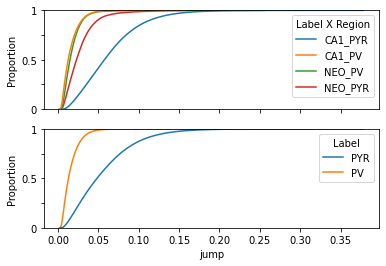

Median of pyramidal jump column is 0.04817015202739037 [0.026789691680895324, 0.07673596922321245]
Median of pv jump column is 0.01280297528727592 [0.007983411590695275, 0.020504797782854682]
Mann-Whitney statistical test results for feature jump are p-value=0.0
Number of unique values is: 690323


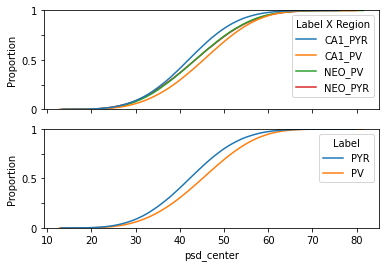

Median of pyramidal psd_center column is 42.23637731190002 [36.0280525259666, 48.46620159500347]
Median of pv psd_center column is 45.13090682353052 [38.370086885750496, 51.67634962160639]
Mann-Whitney statistical test results for feature psd_center are p-value=0.0
Number of unique values is: 690323


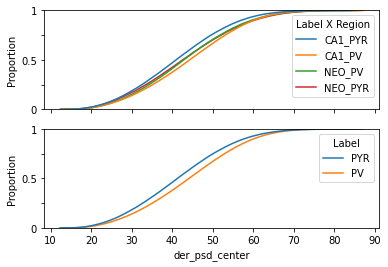

Median of pyramidal der_psd_center column is 41.25164602355433 [32.689446255974275, 50.03226045779171]
Median of pv der_psd_center column is 44.093545814455474 [35.038082409685394, 52.879047117808895]
Mann-Whitney statistical test results for feature der_psd_center are p-value=0.0
Number of unique values is: 690323


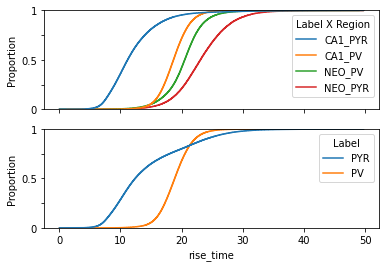

Median of pyramidal rise_time column is 12.375 [9.625, 18.0]
Median of pv rise_time column is 18.875 [17.25, 20.5625]
Mann-Whitney statistical test results for feature rise_time are p-value=0.0
Number of unique values is: 716


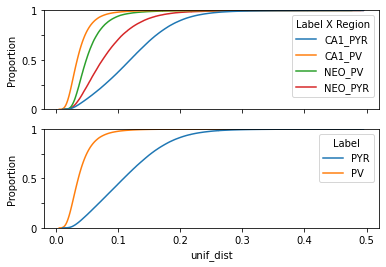

Median of pyramidal unif_dist column is nan [nan, nan]
Median of pv unif_dist column is nan [nan, nan]
Mann-Whitney statistical test results for feature unif_dist are p-value=0.0
Number of unique values is: 689962


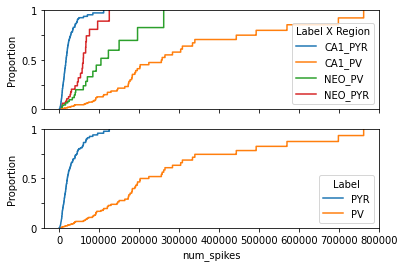

Median of pyramidal num_spikes column is 20843.0 [11852.0, 44416.0]
Median of pv num_spikes column is 224753.0 [145231.0, 443631.0]
Mann-Whitney statistical test results for feature num_spikes are p-value=0.0
Number of unique values is: 505


In [7]:
for feature in df.columns:
    if feature in ['region', 'label', 'Label X Region', 'Label']:
        continue
    change_col(df, feature)
    fig, ax = plt.subplots(2, sharex=True, sharey=True)
    _ = sns.ecdfplot(data=df, x=feature, hue="Label", ax=ax[1])
    _ = sns.ecdfplot(data=df, x=feature, hue="Label X Region", ax=ax[0])
    ax[0].set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax[0].set_yticklabels(['0', '', '0.5', '', '1'])
    
    plt.show()
    
    col_pyr = df[feature][df.label == 1].to_numpy()
    col_pv = df[feature][df.label == 0].to_numpy()
    
    #es = calc_aw(col_pyr, col_pv)
    
    pyr_median, pyr_prec25, pyr_prec75 = np.percentile(col_pyr, [50, 25, 75])
    pv_median, pv_prec25, pv_prec75 = np.percentile(col_pv, [50, 25, 75])
    
    print(f"Median of pyramidal {feature} column is {pyr_median} [{pyr_prec25}, {pyr_prec75}]")
    print(f"Median of pv {feature} column is {pv_median} [{pv_prec25}, {pv_prec75}]")
    
    statistic, p_val = stats.mannwhitneyu(col_pyr, col_pv)
    print(f"Mann-Whitney statistical test results for feature {feature} are p-value={p_val}")
    #print(f"Effect size is {es}")
    print(f"Number of unique values is: {len(np.unique(df[feature].to_numpy()))}")